# **나이브 베이즈 모델을 이용한 스팸메일 분류기**
Calssification

## **1 분류기 Classification**
1. **Binary Classification** (이진 분류기) : **True / False 조건을** 구분한다
1. **Multiclass Classification** (다변량 분류) : **다양한 클래스간의 조건을** 구분한다
1. **Multi-label Classification** (다중 클래스 레이블 분류) : 다중의 클래스간 **겹치는 조건에서** 구분을 한다

<img src="https://wikidocs.net/images/page/4291/logreg702.PNG" width=400>

## **2 텍스트 분류기 Classification**
1. **긍정/ 부정,  긍정/ 중립/ 부정** 분류기
1. **뉴스의 토픽** 분류기 (**class 간 중첩되어** 분류가 가능하다)
1. **Named Entity Recognition** (개체명 분류기) : ex) Naive Bayse, Support Vector Machine

## **3  Naive Bayse Classification 개념**
1. 확률 기반의 분류기
1. **Naive :** 예측을 위한 Token 들이 **Mutually Independent** (상호독립적)을 가정
1. **Bayse :** 관찰한 Token이 **클래스 전체 대비, 특정 클래스 속할 확률을 Bayse 기반** 으로 계산

> **Naive Bayse 메커니즘**

1. 스팸메일과, 정상메일로 구분된 데이터를 사용한다 [download](http://www.aueb.gr/users/ion/data/enron-spam/preprocessed/enron1.tar.gz)
1. 단어 **Token을** 대상으로 **스팸여부를** 학습한다.
1. Data 추가시 잘못 예측한 결과에 대해 **Laplace Smoothing** 으로 보완한 값을 **Bayse 로 공식을** 수정한다

## **4   Naive Bayse 구현하기**
스펨메일 데이터 다운받기 [download](http://www.aueb.gr/users/ion/data/enron-spam/preprocessed/enron1.tar.gz)
<br>
### **01 enron 메일데이터 살펴보기**
1. **Summary.txt** 파일에 저장된 내용 살펴보기
1. **정상메일 (3,672개)** 와 **스펨메일 (1,500)개로** 약 1:2의 비율로 구분이 된다

In [1]:
# 스팸메일 데이터 Summary
with open('./enron1/Summary.txt', 'r') as f:    #./?
    summary = f.read()
print(summary)

Legitimate
----------
- Owner: farmer-d
- Total number: 3672 emails
- Date of first email: 1999-12-10
- Date of last email: 2002-01-11
- Similars deletion: No
- Encoding: No


Spam
----
- Owner: GP
- Total number: 1500 emails
- Date of first email: 2003-12-18
- Date of last email: 2005-09-06
- Similars deletion: No
- Encoding: No

Spam:Legitimate rate = 1:3
Total number of emails (legitimate + spam): 5975



In [2]:
# ham 폴더에 저장된 메일내용 확인 (정상으로 분류된 메일)
file_path = './enron1/pass/0001.caltex.pass.txt'
with open(file_path, 'rt', encoding='UTF8') as infile:
    ham_sample = infile.read()
print(ham_sample)

﻿"최고의 영업사원으로 성장하겠습니다"
GS칼텍스는 정유업을 강점으로 석유화학 및 윤활유에 이르기까지 계속된 성장을 거듭해 왔습니다. 향후 건설될 올레핀 생산시설은 GS칼텍스의 경쟁력을 더욱 높여줄 것입니다. 개인적으로 GS칼텍스가 이처럼 최고의 에너지 기업 자리를 유지하고 있는 원동력은 끊임없이 혁신을 추구하고, 최고가 되기 위해 노력했기 때문이라고 생각합니다.
이러한 GS칼텍스의 행보는 학부 시절 화공생명공학을 전공하고 관심이 있던 경영학을 대학원에서 배우며 도전했던 제 모습과 많이 닮아있다고 느꼈습니다. 또한 '매 순간 최선을 다해 최고에 도전하자'는 가치관을 가진 제게 큰 매력으로 다가왔습니다. GS칼텍스 영업직은 친화력과 추진력을 가진 저의 역량을 극대화할 수 있는 직무입니다. 또한, 제가 배웠던 것을 다방면으로 접목할 수 있는 최고의 기회입니다. 저는 정유업의 기초가 되는 화학공학 지식을 바탕으로 경영학에서 배운 비즈니스 사고를 접목해 최고의 영업사원으로 성장하겠습니다.
"차별화된 경쟁력-융합형 인재"
공학과 경영학을 공부하며 얻은 융합적 사고는 저만의 경쟁력이자 GS칼텍스 영업직에 가장 적합한 이유라고 생각합니다. 저는 학부 때 화공생명공학과를 전공하면서 석사로 경영학 마케팅을 공부했습니다. 융합에 관한 책을 읽은 이후 좀 더 넓은 안목을 가져야 할 필요성을 느꼈고 원하는 목표로 가는 과정에서 어떻게 다른 방식으로 접근하는지 알 수 있었습니다.
마케팅을 깊게 공부하면서 저는 데이터를 분석해 통계학적으로 소비자 행동을 관찰하였고, 더 나아가 숨겨진 메커니즘을 고민해보며 적절한 마케팅 전략을 수립하였습니다. 저는 이 과정에서 사람들을 설득하여 마음을 얻는 영업직에 자연스럽게 관심을 두게 되었습니다. 보스턴컨설팅그룹(BCG) 인턴을 하면서 저만의 논리를 가지고 클라이언트들을 설득한 경험은 최고의 영업 사원이 되고자 하는 제 꿈을 더욱 확고히 해주었습니다. 이러한 저의 경험과 노력은 GS칼텍스의 영업사원으로 업무를 하는데 큰 자산이 될 것입니다.
"편집장

In [3]:
# spam 폴더에 저장된 메일내용 확인 (스팸으로 분류된 메일)
file_path = './enron1/fail/0001.hyundai.fail.txt'
with open(file_path, 'rt', encoding='UTF8') as infile:
    spam_sample = infile.read()
print(spam_sample)

﻿"융합형 인재"
저는 학부 때 화공생명공학과를 전공하면서 석사로 경영학 마케팅을 공부했습니다. 융합에 관한 책을 읽은 이후 좀 더 넓은 안목을 가져야 할 필요성을 느꼈던 것이 계기였습니다. 이왕이면 본 전공과 전혀 다른 분야를 선택하고자 했습니다. 원하는 목표로 가는 과정에서 어떻게 다른 방식으로 접근하는지가 궁금했고 부전공을 통해 더욱 관심이 생긴 마케팅을 선택했습니다.
마케팅을 깊게 공부하면서 저는 데이터를 분석해 통계학적으로 소비자 행동을 관찰하였고 더 나아가 심리학을 기반으로 그 행동의 이유에 대해 고민해볼 수 있었습니다. 저는 이 과정에서 사람들을 설득하여 마음을 얻는 영업직에 자연스럽게 관심을 두게 되었습니다. 현대오일뱅크 영업직은 융합적 사고에 기반을 둔 제가 그동안 배웠던 것을 다방면으로 접목할 수 있는 최고의 기회라고 생각합니다. 저는 정유업의 기초가 되는 화학공학 지식을 바탕으로 경영학에서 배운 비즈니스 사고를 접목해 최고의 영업사원으로 성장하고 싶습니다.
"승부욕, 추진력, 도전"
저는 어렸을 때 강한 승부욕을 가진 청년이었습니다. 학창시절, 반 축구 대항전이나 계주를 나가면 이기기 위해 최선을 다하고 패배하면 큰 아쉬움에 친구들과 눈물을 보이곤 했습니다. 누구와 금방 친해질 수 있는 성격을 가졌던 저는 학창시절 줄곧 반장을 맡으면서 꽤 대담한 일에도 나아갈 수 있는 추진력을 길렀습니다. 대표적으로, 중학교 2학년 때 체육 담임선생님을 도와 반 친구들과 대전 마라톤 대회에 나간 경험을 소개하고 싶습니다. 저는 반장으로서 친구들과 계속해서 소통하고 힘든 시기를 함께 극복하며 모든 친구가 10km 마라톤을 완주하는 데에 큰 도움을 주었습니다. 고등학교 때에도 친구들과 함께 ‘시그마’라는 수학동아리를 만들어서 부족한 부분을 공유하고 다 같이 세미나를 여는 등 실력 배양을 위해 계속 도전을 하였습니다. 학창 시절의 이러한 경험들을 통해 저는 긍정적인 사고로 ‘매 순간 최선을 다해 최고에 도전하자’라는 제 가치관을 정립할 수 있었습니다.
"강인한 

### **02 enron 메일 데이터 분류하기**
1. 스펨메일과 정상메일을 레이블을 사용하여 분류한다
1. 1 : 스펨메일,  0 : 정상메일
1. 분류된 데이터를 전처리 과정을 진행한다

In [4]:
import glob, os
# 정상매일은 0, 스펨매일은 1
emails, labels = [], []
for no, file_path in enumerate(['./enron1/fail/','./enron1/pass/']):
    for filename in glob.glob(os.path.join(file_path, '*.txt')):
        try:
            with open(filename, 'rt', encoding='utf-8') as infile:  #line?? 
                emails.append(infile.read())
                labels.append(no)
        except UnicodeDecodeError as e:
            print(filename)
       

In [5]:
len(emails)

33

In [6]:
#패키지 이용하기
#!pip 
from konlpy.tag import Twitter
from konlpy.tag import Kkma
kkma= Kkma()

C:\Users\bgmm0\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [7]:
kkma.sentences('한국어 분석을 시작합니다 안녕하세요~~')

['한국어 분석을 시작합니다', '안녕 하세요~~']

In [8]:
kkma.pos('한국어 분석을 시작합니다 안녕하세요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('안녕', 'NNG'),
 ('하세', 'NNG'),
 ('요', 'JX'),
 ('~~', 'SW')]

In [9]:
#문장단위로 쪼개보기!
z=[]
for email in emails:
    sp = kkma.sentences(email)
    for sen in sp:
        z.append(sen)


In [13]:
z.index('\ufeff" 최고의 영업사원으로 성장하겠습니다')

817

In [14]:
z[817]

'\ufeff" 최고의 영업사원으로 성장하겠습니다'

In [17]:
type(labels[0])

int

In [23]:
labels=[]
for i in range(817):
    labels.append(0)
for i in range(415):
    labels.append(1)
    

In [24]:
len(labels)

1232

### **03 enron 메일 데이터 임베딩**
1. Chapter 2 에서 진행한 내용을 바탕으로 전처리 작업을 진행한다
1. **숫자와 구두점** 제거, **StopWords** 제거, **표제어 원형** 복원
1. 정제된 데이터로 **희소벡터 (Sparse Vector)** 로 임베딩 ex) (**row index, feacture/term index**)

[Install_nltk](https://www.nltk.org/install.html)

[download_nltk_data](https://stackoverflow.com/questions/35861482/nltk-lookup-error)

```
import nltk
nltk.download('all')
```

In [25]:
#download_nltk_data
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\bgmm0\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\bgmm0\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\bgmm0\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\bgmm0\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\bgmm0\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\b

[nltk_data]    |   Package qc is already up-to-date!
[nltk_data]    | Downloading package reuters to
[nltk_data]    |     C:\Users\bgmm0\AppData\Roaming\nltk_data...
[nltk_data]    |   Package reuters is already up-to-date!
[nltk_data]    | Downloading package rte to
[nltk_data]    |     C:\Users\bgmm0\AppData\Roaming\nltk_data...
[nltk_data]    |   Package rte is already up-to-date!
[nltk_data]    | Downloading package semcor to
[nltk_data]    |     C:\Users\bgmm0\AppData\Roaming\nltk_data...
[nltk_data]    |   Package semcor is already up-to-date!
[nltk_data]    | Downloading package senseval to
[nltk_data]    |     C:\Users\bgmm0\AppData\Roaming\nltk_data...
[nltk_data]    |   Package senseval is already up-to-date!
[nltk_data]    | Downloading package sentiwordnet to
[nltk_data]    |     C:\Users\bgmm0\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sentiwordnet is already up-to-date!
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     C:\Users\bg

True

In [27]:
%%time
# 출현빈도가 높은 상위 500개의 Token을 대상으로 임베딩 한다
# 희소벡터(Sparse Vector)로 변환 : (row index, feacture/term index)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words="english", max_features=500)
term_docs      = cv.fit_transform(z)
print("모델의 Type: {}\n임베딩의 크기: {}\n0번문장 내용보기: \n{}".format(
    type(term_docs),
    term_docs.shape, # 5,172개 문장을 500개 단어로 생성
    term_docs [2]))  # 0번 문장의 단어 Vector 목록을 출력   #0이 안나옴!!  #개수도 5172개 문장이 아닌디? 

모델의 Type: <class 'scipy.sparse.csr.csr_matrix'>
임베딩의 크기: (1232, 500)
0번문장 내용보기: 
  (0, 484)	1
  (0, 110)	1
Wall time: 78.8 ms


In [28]:
term_docs

<1232x500 sparse matrix of type '<class 'numpy.int64'>'
	with 9441 stored elements in Compressed Sparse Row format>

In [29]:
# cv 모델로 인덱스별 단어 Token 내용보기
# feature_mapping = cv.vocabulary_       # dict 로 내용출력 (key:value)

print(cv.get_feature_names()[:7])
feature_names   = cv.get_feature_names() # List 로 내용출력 (인덱스별 value)
for indx in [0, 162, 481, 357, 125]:
    print(indx, ":", feature_names[indx])

['2018', '2019', '2년', '4차', '52', 'bcg', 'forest']
0 : 2018
162 : 만들어
481 : 함께
357 : 재고
125 : 데이터에


In [30]:
for indx in range(500):
    print(indx, ":", feature_names[indx])

0 : 2018
1 : 2019
2 : 2년
3 : 4차
4 : 52
5 : bcg
6 : forest
7 : gs
8 : lg
9 : nice
10 : python
11 : python을
12 : ra
13 : random
14 : regression
15 : sas
16 : sns
17 : 가는
18 : 가장
19 : 가져야
20 : 가지고
21 : 가진
22 : 가치관을
23 : 가치를
24 : 간의
25 : 강점인
26 : 강조한
27 : 같은
28 : 같이
29 : 개인적으로
30 : 거래
31 : 것에
32 : 것으로
33 : 것을
34 : 것이
35 : 것이었습니다
36 : 것입니다
37 : 결과
38 : 결과를
39 : 경영
40 : 경영학
41 : 경영학을
42 : 경험
43 : 경험은
44 : 경험을
45 : 경험이
46 : 경험하고
47 : 계량
48 : 계속해서
49 : 고객
50 : 고객들의
51 : 고객에게
52 : 고객을
53 : 고객의
54 : 고객이
55 : 고등학교
56 : 고민해
57 : 공공
58 : 공부했습니다
59 : 공유하고
60 : 과의
61 : 과정에서
62 : 과정을
63 : 과제
64 : 관련
65 : 관련된
66 : 관심을
67 : 관심이
68 : 관점에서
69 : 관한
70 : 구매
71 : 구매하는
72 : 구현해
73 : 국내
74 : 그동안
75 : 그룹
76 : 그리고
77 : 긍정적인
78 : 기반
79 : 기법을
80 : 기부에
81 : 기부할
82 : 기술을
83 : 기업
84 : 기업의
85 : 기업이
86 : 기여하고
87 : 기존
88 : 기존에
89 : 기한에
90 : 기한이
91 : 기회라고
92 : 기획
93 : 기획하는
94 : 꿈을
95 : 끊임없이
96 : 내는
97 : 내적
98 : 너무
99 : 넓은
100 : 노력했습니다
101 : 높은
102 : 느꼈고
103 : 느꼈습니다
104 : 느낀
105 : 느낄
106 : 능력을
107 : 다가왔습니다
108 : 다루는
109 :

### **04-1 Naive Bayse 학습을 위한 준비작업**
모델의 학습을 위한 준비작업으로 데이터를 그룹화 한다

In [134]:
# 레이블을 기준으로 데이터를 그룹화 한다
# defaultdict : 스팸여부 0,1 Tag 로 Token Index List 생성
def get_label_index(labels):
    from collections import defaultdict
    label_index = defaultdict(list)
    for index, label in enumerate(labels):
        label_index[label].append(index)
    return label_index

# 0 ~ 3600 : 정상메일[0], 3600 ~ 나머지 : 스팸메일[1]
label_index = get_label_index(labels)
print(label_index.keys())
label_index[1][:10]

dict_keys([0, 1])


[3672, 3673, 3674, 3675, 3676, 3677, 3678, 3679, 3680, 3681]

### **04-2 Naive Bayse 위한 사전확률/ 우도값 계산**
**사전확률 및 우도값을** 계산하는 함수를 정의한다

In [135]:
# 학습 샘플을 활용하여 사전 확률을 계산 
def get_prior(label_index):
    """ Compute prior based on training samples
    Args:    label_index (grouped sample indices by class)
    Returns: { 단어 key : corresponding prior } """
    prior = {label: len(index) for label, index in label_index.items()}
    total_count = sum(prior.values())
    for label in prior:
        prior[label] /= float(total_count)
    return prior
""
# 위의 인덱스 데이터를 활용하여 사전확률을 계산한다
prior = get_prior(label_index)
prior

{0: 0.7099767981438515, 1: 0.2900232018561485}

In [136]:
# 확률적 유사가능도(최대 가능도 추정)를 계산: 빈도상위 500개의 단어로 조건부 확률 p(feature|spam)을 계산
import numpy as np
def get_likelihood(term_document_matrix, label_index, smoothing=0):
    """ 훈련 데이터로 우도값 측정
    Args:    term_document_matrix, label_index, smoothing        
    Returns: { 단어 key, 동시확률 P(feature|class) }
    """
    likelihood = {}
    for label, index in label_index.items():
        likelihood[label] = term_document_matrix[index, :].sum(axis=0) + smoothing
        likelihood[label] = np.asarray(likelihood[label])[0]
        total_count       = likelihood[label].sum()
        likelihood[label] = likelihood[label] / float(total_count)
    return likelihood

smoothing  = 1           # 라플라스 스무딩
likelihood = get_likelihood(term_docs, label_index, smoothing)
print("우도값 shape : {}\n단어 내용보기 : {}\n우도값 array :\n{}".format(
    likelihood[0].shape, # 0번 레이블일 때 단어별 우도값 계산
    feature_names[:5],   # 인덱스별 단어 확인
    likelihood[0][:20])) # 0번 레이블의 단어별 우도값 샘플 [:20]

우도값 shape : (500,)
단어 내용보기 : ['able', 'access', 'account', 'accounting', 'act']
우도값 array :
[1.08580656e-03 9.57737068e-04 8.79781725e-04 8.46372292e-04
 1.00228298e-04 2.39434267e-04 1.97115652e-03 1.34194554e-03
 1.84308703e-03 8.35235815e-04 1.08023832e-03 1.03012417e-03
 1.67047163e-05 1.50342447e-04 7.62848711e-04 8.40804054e-04
 8.12962860e-04 2.22172727e-03 1.99342948e-03 5.01141489e-05]


### **04-3 자연 Log 를 활용한 예측함수 구현하기**
- 앞에서 측정한 **사전확률과 및 우도값을** 활용하여 예측함수를 정의 합니다
- 단어들의 확률을 합치기 위해, **Log()** 로 변환 후 **경우의 수를 모두 합칩니다**

In [137]:
# OverFlow가 발생 가능하므로, 데이터를 Log() 자연로그로 변환 후 덧셈 계산,
# 계산이 끝난 뒤, 로그의 역함수 (exp()) 를 활용하여 실수로 변환한다
def get_posterior(term_document_matrix, prior, likelihood):
    """ 사전확률과 유사가능도를 바탕으로 샘플 데이터의 사후확률을 계산
    Args:
        term_document_matrix (sparse matrix)
        prior      { 단어 Key : 사전확률 }
        likelihood { 단어 Key : 조건부 확률 }
    Returns:       { 단어 Key : 관련 사후 확률값 }
    """
    # 확률의 연산시 log() 로 변환한 후 합친다
    num_docs, posteriors = term_document_matrix.shape[0], []
    for i in range(num_docs):
        # 사후확률 : 사전확률 X 유사가능도(최대 가능도 추정량)
        posterior = {key: np.log(prior_label) for key, prior_label in prior.items()}
        for label, likelihood_label in likelihood.items():
            term_document_vector = term_document_matrix.getrow(i)
            counts  = term_document_vector.data
            indices = term_document_vector.indices
            for count, index in zip(counts, indices):
                posterior[label] += np.log(likelihood_label[index]) * count
        # exp(-1000):exp(-999) 는 분모가 0이 되는 문제가 발생
        # 하지만 exp(0):exp(1)과 동치가 된다.
        min_log_posterior = min(posterior.values())
        for label in posterior:
            try:    posterior[label] = np.exp(posterior[label] - min_log_posterior)
            except: posterior[label] = float('inf') # 값이 너무 클때
        # 전체 합이 1이 되도록 정규화
        sum_posterior = sum(posterior.values())
        for label in posterior:
            if posterior[label] == float('inf'): posterior[label] = 1.0
            else: posterior[label] /= sum_posterior
        posteriors.append(posterior.copy())
    return posteriors

In [138]:
# 테스트 메일을 사용하여 알고리즘을 검증
emails_test = [
    '''Subject: flat screens hello ,
    please call or contact regarding the other flat screens requested .
    trisha tlapek - eb 3132 b michael sergeev - eb 3132 a
    also the sun blocker that was taken away from eb 3131 a .
    trisha should two monitors also michael .thanks kevin moore''',
    
    '''Subject: having problems in bed ? we can help !
    cialis allows men to enjoy a fully normal sex life without having to plan the sexual act .
    if we let things terrify us , life will not be worth living .
    brevity is the soul of lingerie . suspicion always haunts the guilty mind .''']

cleaned_test   = clean_text(emails_test)
term_docs_test = cv.transform(cleaned_test)
posterior      = get_posterior(term_docs_test, prior, likelihood)
from pprint import pprint
pprint(posterior)
# 검증결과 0번 메일은 0.98로 정상, 1번 메일은 0.99로 스펨에 해당

[{0: 0.9815828838777807, 1: 0.018417116122219333},
 {0: 1.5274461154428757e-06, 1: 0.9999984725538845}]


### **04-4 학습을 위해 Train / Test 데이터를 나눈다**
scikit-learn 모듈 **train_test_split** 을 사용한다

In [139]:
from collections import Counter
Counter(labels)

Counter({0: 3672, 1: 1500})

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    cleaned_emails,  # X_train, X_test 로 추출
    labels,          # Y_train, Y_test 로 추출
    test_size    = 0.33, 
    random_state = 44)  #set seed
print("Train 'email':{:,}, 'label':{:,}\nTest  'email':{:,}, 'label':{:,}".format(
    len(X_train), len(Y_train), len(X_test), len(Y_test)))

Train 'email':3,465, 'label':3,465
Test  'email':1,707, 'label':1,707


In [150]:
# 데이터 Set의 사후 확률을 예측한다
term_docs_train = cv.fit_transform(X_train)
label_index     = get_label_index(Y_train)
prior           = get_prior(label_index)
likelihood      = get_likelihood(term_docs_train, label_index, smoothing)

# Test / 신규 데이터 Set의 사후확률을 예측한다
term_docs_test = cv.transform(X_test)
posterior = get_posterior(term_docs_test, prior, likelihood)
correct   = 0.0

for pred, actual in zip(posterior, Y_test):
    if actual == 1:
        if pred[1] >= 0.5: correct += 1
    elif pred[0] > 0.5: correct += 1

# dtype 을 128 이상으로 지정할 것
# https://stackoverflow.com/questions/40726490/overflow-error-in-pythons-numpy-exp-function/40726641
print('{:,} 개의 테스트 데이터(Y_test)의 정확도는: {:.1f} %'.format(
    len(Y_test), correct/len(Y_test)*100))

1,707 개의 테스트 데이터(Y_test)의 정확도는: 92.1 %


<br/>
###  **5 Sklearn 을 활용한 Naive Bayse 구현하기**
- 위에서 복잡한 과정을 sklearn으로 실습 합니다
- nltk 모듈을 활용한 예제 [nltk_tutorial](https://nbviewer.jupyter.org/github/YongBeomKim/nltk_tutorial/blob/master/ipython/03-2.Bayse.ipynb)
### **01 데이터 전처리 및 모델학습**
모델을 학습한 뒤 정확도를 측정한다
```python
# cleaned_emails[0] : 전처리된 텍스트 List
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words="english", max_features=500)
term_docs_test = cv.transform(cleaned_test)
```

In [98]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha     = 1.0,  # 라플라스 Smoothing 값
                    fit_prior = True) # Data Set로 학습된 사전확률 사용
clf.fit(term_docs_train, Y_train)
prediction_prob = clf.predict_proba(term_docs_test)
prediction_prob[0:6]

array([[1.00000000e+00, 6.68003334e-17],
       [1.00000000e+00, 2.29128184e-18],
       [3.36414957e-10, 1.00000000e+00],
       [1.00403852e-07, 9.99999900e-01],
       [1.00000000e+00, 1.92367567e-52],
       [1.00000000e+00, 1.99670993e-33]])

In [97]:
# 예측한 클래스 값을 바로 계산하여 출력한다
# 역치값은 0.5로 0.5보다 크면 1, 작으면 0을 출력
prediction = clf.predict(term_docs_test)
prediction[:10]

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [95]:
# test 값을 활용하여 모델의 정확도 측정 
accuracy = clf.score(term_docs_test, Y_test)
print('The accuracy using MultinomialNB is: {0:.1f}%'.format(accuracy*100))

The accuracy using MultinomialNB is: 90.5%


### **02 분류기의 성능 평가**
**혼동행렬(Confusion Matrix) 분할표로** 예측값을 테스트하여 출력한다

<img src="https://docs.microsoft.com/ko-kr/azure/machine-learning/studio/media/evaluate-model-performance/6a.png" align="left">

In [75]:
# 혼동행렬을 계산
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, prediction, labels=[0, 1])

array([[1140,   89],
       [  48,  430]], dtype=int64)

In [76]:
# f1 Score 를 측정하여 정밀도, 재연율을 계산
from sklearn.metrics import precision_score, recall_score, f1_score
print("""Precesion(정밀도) : {:.4}\nRecall(재현율) : {:.4}
f1 score (1) : {:.4} \nf1 score (0) : {:.4}""".format(
    precision_score(Y_test, prediction, pos_label=1),
    recall_score(Y_test, prediction, pos_label=1),
    f1_score(Y_test, prediction, pos_label=1),
    f1_score(Y_test, prediction, pos_label=0)))

Precesion(정밀도) : 0.8285
Recall(재현율) : 0.8996
f1 score (1) : 0.8626 
f1 score (0) : 0.9433


In [77]:
# 위 내용을 한꺼번에 실행해본다
from sklearn.metrics import classification_report
report = classification_report(Y_test, prediction)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1229
           1       0.83      0.90      0.86       478

    accuracy                           0.92      1707
   macro avg       0.89      0.91      0.90      1707
weighted avg       0.92      0.92      0.92      1707



### **03 분류기의 성능 평가**
1. **정확도**(훈련데이터 적합도) 와 **재현율**(일반화 정도)이 **모두 높은 경우가 없기** 때문에 f1-score를 측정한다
1. 하지만 모델의 **평균값과,** 모델의 **f1-score** 둘 다 높은 모델은 없으므로 별도 기준이 필요
1. 대표적인 대안으로 **ROC (Receiver Operation Characteristic), AUC (Area Under the Curve)** 가 있다
1. 이번 예제에서는 **ROC**를 그려보자

In [78]:
%%time
# ROC Curve 값들을 계산합니다
pos_prob   = prediction_prob[:, 1]
thresholds = np.arange(0.0, 1.2, 0.1)
true_pos   = [0]*len(thresholds) 
false_pos  = [0]*len(thresholds)

for pred, y in zip(pos_prob, Y_test):
    for i, threshold in enumerate(thresholds):
        if pred >= threshold:
            if y == 1: true_pos[i] += 1
            else:      false_pos[i] += 1
        else: break

# 임계치를 설정하기 위해 양성비율과, 음성 비율을 계산한다
# 양성 테스트 샘플이 516개, 음성 테스트 샘플이 1,191개 이다
true_pos_rate  = [tp / 516.0  for tp in true_pos]
false_pos_rate = [fp / 1191.0 for fp in false_pos]

Wall time: 6.98 ms


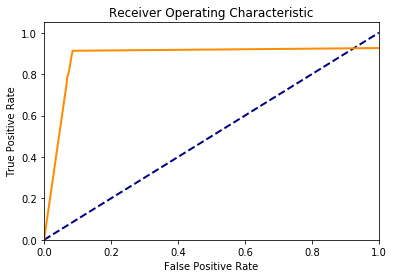

In [24]:
%matplotlib inline
# ROC Curve 를 출력한다
import matplotlib.pyplot as plt
lw = 2   # BaseLine을 그린다
plt.plot([0, 1], [0, 1], color='navy',  lw=lw, linestyle='--')
plt.plot(false_pos_rate, true_pos_rate, color = 'darkorange', lw = lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

In [79]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, pos_prob)

0.9574295869349848

<br>
## **6 Sklearn 을 활용한 모델의 튜닟 및 교차검증**
1. 모델이 실질적으로 잘 작동하는지 **K-fold 검정을** 적용한다
1. **AUC 값의** 측정 : **ROC 커브의** 밑면적을 구한 값으로 **1에 가까울수록** 성능이 좋다.[참고](http://newsight.tistory.com/53)

<img src="https://upload.wikimedia.org/wikipedia/commons/1/1c/K-fold_cross_validation_EN.jpg" align="left">

In [80]:
# 전체 10개의 폴드 생성기로 초기화 후 파라미터 분석을 진행합니다
from sklearn.model_selection import StratifiedKFold
k = 10
k_fold = StratifiedKFold(n_splits=k)

# 연산을 위해 Numpy 객체로 변환한다
cleaned_emails_np = np.array(cleaned_emails)
labels_np         = np.array(labels)

# 10 폴드 생성기 학습을 위한 파라미터를 정의합니다
max_features_option     = [2000, 4000, 8000]   # 가장 많이 사용되는 N개 단어를 선택
smoothing_factor_option = [0.5, 1.0, 1.5, 2.0] # Smoothing Parameter : 초기값
fit_prior_option        = [True, False]        # 사전 확률을 사용할지 여부

In [81]:
%%time
auc_record = {} # k_fold 분리된 객체를 활용하여 개별 환경에서 AUC를 측정
for train_indices, test_indices in k_fold.split(cleaned_emails, labels):
    X_train, X_test = cleaned_emails_np[train_indices], cleaned_emails_np[test_indices]
    Y_train, Y_test = labels_np[train_indices], labels_np[test_indices]

    # max_features_option 환경값을 바꿔가면서 AUC 테스트
    for max_features in max_features_option:        
        if max_features not in auc_record:
            auc_record[max_features] = {}
        cv = CountVectorizer(stop_words="english", max_features=max_features)
        term_docs_train = cv.fit_transform(X_train)
        term_docs_test  = cv.transform(X_test)
        
        # smoothing_factor_option 초기값을 바꾸며 AUC 테스트
        for smoothing_factor in smoothing_factor_option:
            if smoothing_factor not in auc_record[max_features]:
                auc_record[max_features][smoothing_factor] = {}
            
            # fit_prior_option : 사전확률을 바꾸며 AUC 테스트
            for fit_prior in fit_prior_option:
                clf = MultinomialNB(alpha=smoothing_factor, fit_prior=fit_prior)
                clf.fit(term_docs_train, Y_train)
                prediction_prob = clf.predict_proba(term_docs_test)
                pos_prob        = prediction_prob[:, 1]
                auc             = roc_auc_score(Y_test, pos_prob)
                auc_record[max_features][smoothing_factor][fit_prior] \
                    = auc + auc_record[max_features][smoothing_factor].get(fit_prior, 0.0)                

# 위에서 계산한 결과를 출력합니다
auc_result = []
for max_features, max_feature_record in auc_record.items():
    for smoothing, smoothing_record in max_feature_record.items():
        for fit_prior, auc in smoothing_record.items():
            auc_result.append([max_features, smoothing, fit_prior, auc/k])

Wall time: 35.8 s


In [82]:
import pandas as pd
auc_result = pd.DataFrame(auc_result)
auc_result.columns = ['max features', 'smoothing', 'fit prior', 'auc']
auc_result = auc_result.sort_values('auc', ascending=False).reset_index(drop=True)
auc_result.head()

max features  smoothing  fit prior       auc
0          8000        0.5       True  0.985628
1          8000        0.5      False  0.985476
2          8000        1.0       True  0.984538
3          8000        1.0      False  0.984527
4          8000        1.5      False  0.984114